<a href="https://colab.research.google.com/github/valansgh/aiml/blob/main/Copy_of_ML_C62_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps for EDA:
- Today:
- Import Necessary Libraries
- Load the data and Data dictionary (if available)
- Data Understanding
- Missing Value Check
- Segmentation of Columns (Optional)
- Tomorrow:
- Analysis:
    - Univariate Analysis (One Variable at a time)
    - Bivariate Analysis (Two Variable at a time)
    - Multivariate Analysis (More than two Variables at a time)

## Importing Necessary Library

In [ ]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [ ]:
df=pd.read_csv("titanic_dataset.csv")
#https://drive.google.com/file/d/1plN-KWVopblsqOdgTYPn-O-zG5cWrkf7/view?usp=drive_link

In [ ]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
# Problem Statement: Variables/Factors affected the survival of passengers

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Value Check

In [ ]:
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
## Cabin column has more than 40% of missing values so straight away dropping it
df1=df.drop("Cabin",axis=1)

In [ ]:
100*df1.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [ ]:
## Numerical column --> Mean/Median (median is preferred as it is least effected with outliers)
## Categorical column --> Mode

In [ ]:
arr=np.array([1,2,3,4,5])
print("Mean:",np.mean(arr))
print("Median:",np.median(arr))

Mean: 3.0
Median: 3.0


In [ ]:
arr=np.array([1,2,3,4,5,100])
print("Mean:",np.mean(arr))
print("Median:",np.median(arr))

Mean: 19.166666666666668
Median: 3.5


In [ ]:
med=df1["Age"].median()
df1["Age"]=df1["Age"].fillna(med)# replacing the missing values with median i.e. 28

In [ ]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
# Embarked column has very less missing values so for this column we can use any of the approach
# that we can either drop the rows or we can impute with mode

In [ ]:
df2=df1[df1["Embarked"].notna()]# dropping works where embarked column is missing
df2.shape

(889, 11)

In [ ]:
mod=df1["Embarked"].mode()[0]
df1["Embarked"]=df1["Embarked"].fillna(mod)# replacing the missing values with mode i.e. 'S'

In [ ]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


### Segmentation (Optional)

In [ ]:
df1.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [ ]:
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
num_cols=["Age","Fare"]
extra_cols=["PassengerId","Name","Ticket"]

## Univariate Analysis

### Numerical

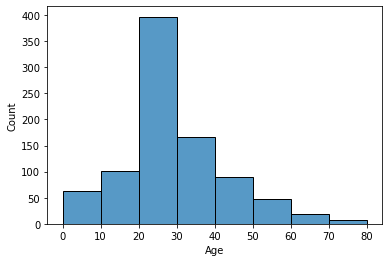

In [ ]:
sns.histplot(x=df1["Age"],bins=range(0,90,10))
plt.show()

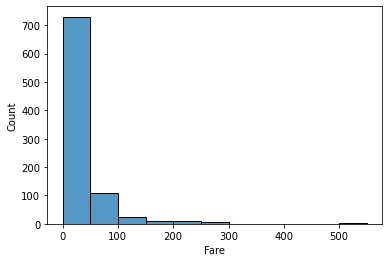

In [ ]:
sns.histplot(x=df1["Fare"],bins=range(0,600,50))
plt.show()

In [ ]:
df1["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

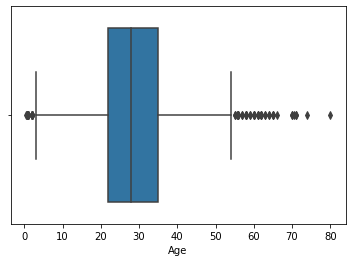

In [ ]:
sns.boxplot(x=df1["Age"])
plt.show()
# quartiles = Quarter + Percentiles
# Q1-> 25%, Q2 -> 50%, Q3-> 75%
# Upper Boundary = Q3 +1.5*(Q3-Q1)
# Lower Boundary = Q1 -1.5*(Q3-Q1)

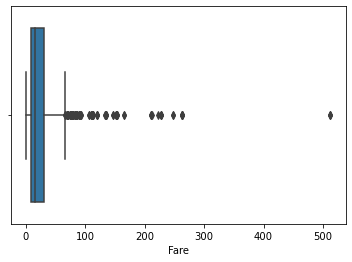

In [ ]:
sns.boxplot(x=df1["Fare"])
plt.show()

### Categorical

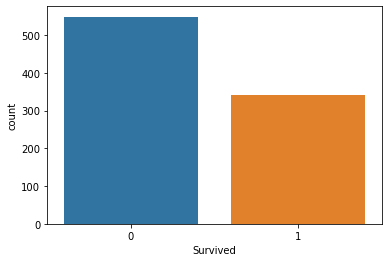

In [ ]:
sns.countplot(x=df1["Survived"])
plt.show()

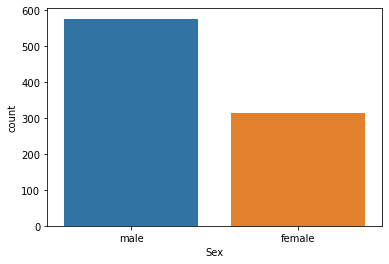

In [ ]:
sns.countplot(x=df1["Sex"])
plt.show()

Countplot of Survived


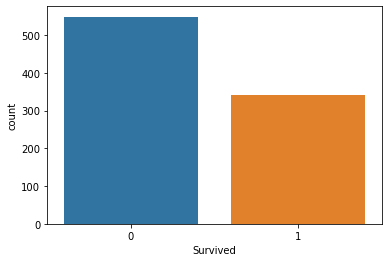

Countplot of Pclass


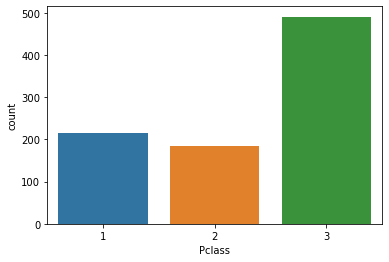

Countplot of Sex


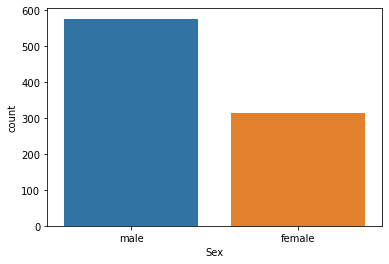

Countplot of SibSp


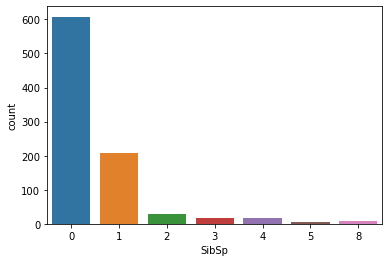

Countplot of Parch


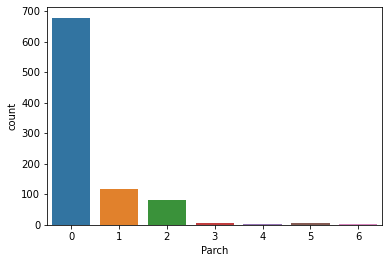

Countplot of Embarked


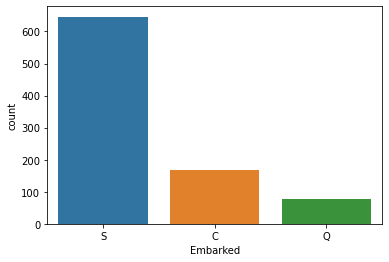

In [ ]:
for i in cat_cols:
    print("Countplot of",i)
    sns.countplot(x=df1[i])
    plt.show()

In [ ]:
y=df1["Pclass"].value_counts(normalize=True).values
names=df1["Pclass"].value_counts(normalize=True).index

In [ ]:
df1["Sex"].value_counts(normalize=True).index

array(['male', 'female'], dtype=object)

In [ ]:
df1["Sex"].value_counts(normalize=True).values

array([0.64758698, 0.35241302])

--------------- Survived -------------------


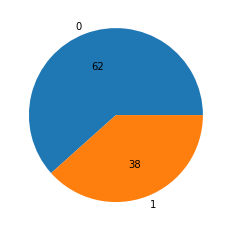

--------------- Pclass -------------------


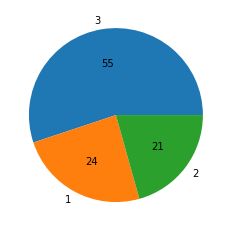

--------------- Sex -------------------


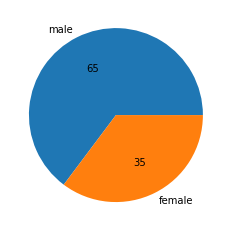

--------------- SibSp -------------------


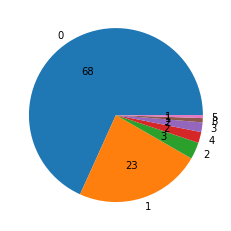

--------------- Parch -------------------


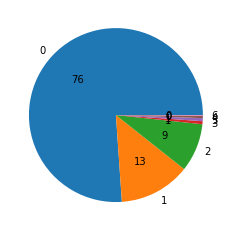

--------------- Embarked -------------------


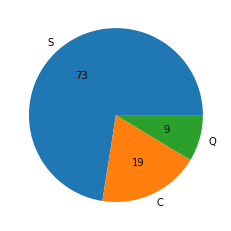

In [ ]:
for i in cat_cols:
    print("---------------",i,"-------------------")
    y=df1[i].value_counts(normalize=True).values
    names=df1[i].value_counts(normalize=True).index
    plt.pie(y, labels = names,autopct="%.0f")
    plt.show()


In [ ]:
df1[i].value_counts(normalize=True)

S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

## Bivariate Analysis

### Numerical Vs Numerical

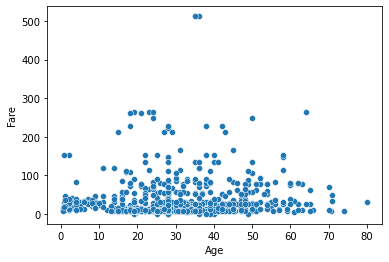

In [ ]:
sns.scatterplot(x=df1["Age"],y=df1["Fare"])
plt.show()

### Numerical Vs Categorical

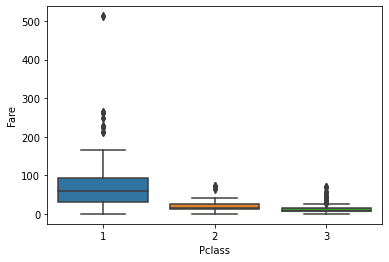

In [ ]:
sns.boxplot(x=df1["Pclass"],y=df1["Fare"])
#X-axis -> Categorical Column
#Y-axis -> Numerical Column
plt.show()

Boxplot of Survived Vs Age


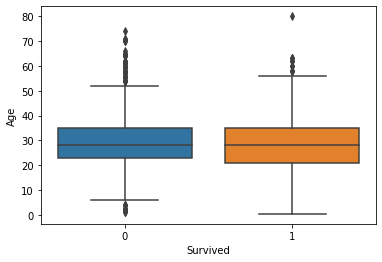

Boxplot of Survived Vs Fare


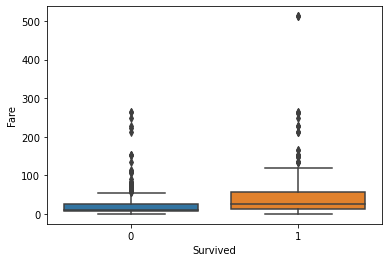

Boxplot of Pclass Vs Age


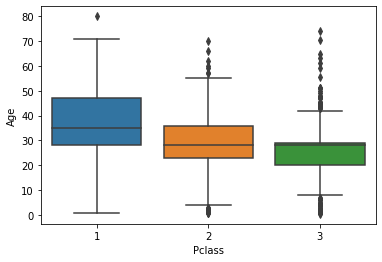

Boxplot of Pclass Vs Fare


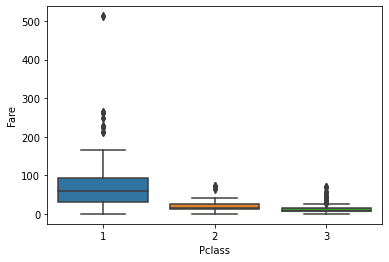

Boxplot of Sex Vs Age


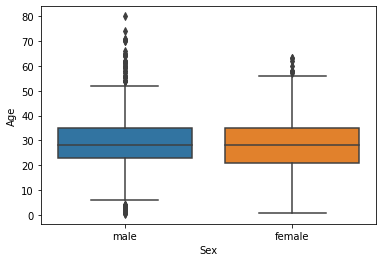

Boxplot of Sex Vs Fare


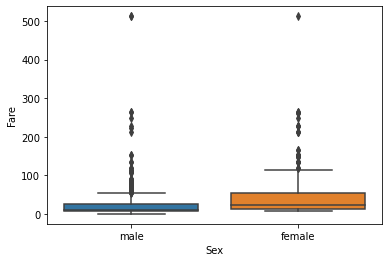

Boxplot of SibSp Vs Age


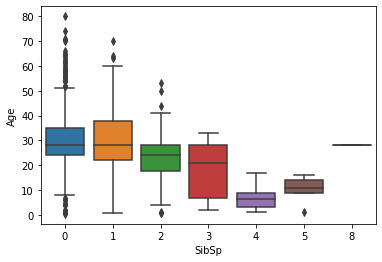

Boxplot of SibSp Vs Fare


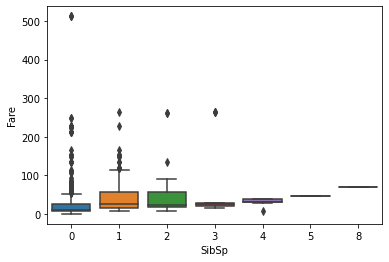

Boxplot of Parch Vs Age


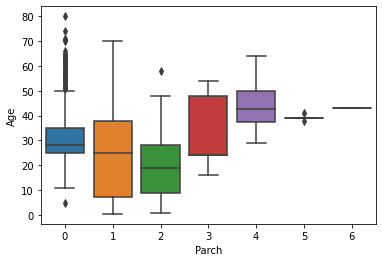

Boxplot of Parch Vs Fare


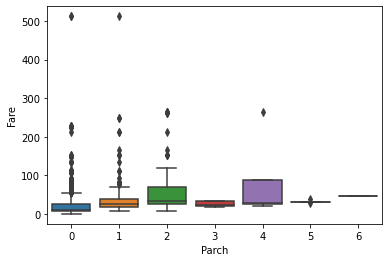

Boxplot of Embarked Vs Age


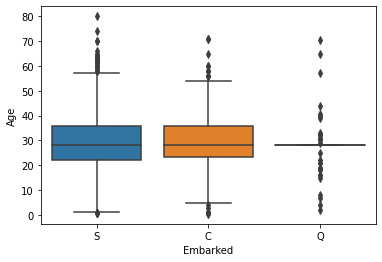

Boxplot of Embarked Vs Fare


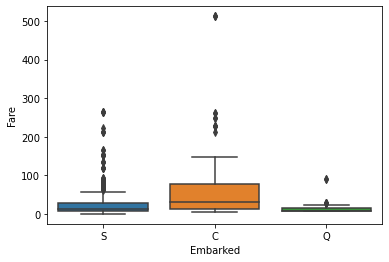

In [ ]:
for col1 in cat_cols:
    for col2 in num_cols:
        print("Boxplot of",col1,"Vs",col2)
        sns.boxplot(x=df1[col1],y=df1[col2])
        plt.show()

In [ ]:
# Bring 3 insights from Bivariate Results of Numerical Vs Categorical Column

### Categorical Vs Categorical

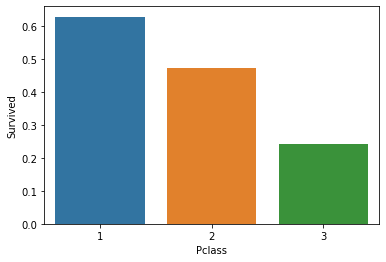

In [ ]:
sns.barplot(x=df1["Pclass"],y=df1["Survived"],ci=None)
plt.show()

## Multivariate Analysis

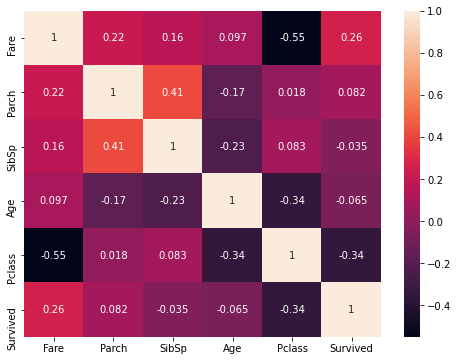

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df1[["Fare","Parch","SibSp","Age","Pclass","Survived"]].corr(),annot=True)
plt.show()

In [ ]:
## Correlation represents strength of relationship between variables
## Correlation lies in the range of -1 to 1
## Negative correlation  (0 to -1) shows inverse relationship
## Positive correlation (0 to 1) shows direct relationship
## 0 correlation represents no relationship.